In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('adult_data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary']

In [4]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [6]:
def handle_capital_gain(df):
    df['capital_gain'] = np.where(df['capital_gain'] == 0, np.nan, df['capital_gain'])
    df['capital_gain'] = np.log(df['capital_gain'])
    df['capital_gain'] = df['capital_gain'].replace(np.nan, 0)


def capital_loss_log(df):
    df['capital_loss'] = np.where(df['capital_loss'] == 0, np.nan, df['capital_loss'])
    df['capital_loss'] = np.log(df['capital_loss'])
    df['capital_loss'] = df['capital_loss'].replace(np.nan, 0)

In [7]:
handle_capital_gain(df)
capital_loss_log(df)

## Handling Outliers

In [8]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,Cuba,<=50K


In [9]:
def remove_outlier_hours_per_week(df):
    IQR = df['hours_per_week'].quantile(0.75) - df['hours_per_week'].quantile(0.25)
    
    lower_range = df['hours_per_week'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['hours_per_week'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['hours_per_week'] <= lower_range, 'hours_per_week'] = lower_range
    df.loc[df['hours_per_week'] >= upper_range, 'hours_per_week'] = upper_range

def remove_outlier_education_num(df):
    IQR = df['education_num'].quantile(0.75) - df['education_num'].quantile(0.25)
    
    lower_range = df['education_num'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['education_num'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['education_num'] <= lower_range, 'education_num'] = lower_range
    df.loc[df['education_num'] >= upper_range, 'education_num'] = upper_range

def remove_outlier_capital_loss(df):
    IQR = df['capital_loss'].quantile(0.75) - df['capital_loss'].quantile(0.25)
    
    lower_range = df['capital_loss'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['capital_loss'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['capital_loss'] <= lower_range, 'capital_loss'] = lower_range
    df.loc[df['capital_loss'] >= upper_range, 'capital_loss'] = upper_range

def remove_outlier_capital_gain(df):
    IQR = df['capital_gain'].quantile(0.75) - df['capital_gain'].quantile(0.25)
    
    lower_range = df['capital_gain'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['capital_gain'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['capital_gain'] <= lower_range, 'capital_gain'] = lower_range
    df.loc[df['capital_gain'] >= upper_range, 'capital_gain'] = upper_range

In [10]:
remove_outlier_capital_loss(df)
remove_outlier_education_num(df)
remove_outlier_hours_per_week(df)
remove_outlier_capital_gain(df)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

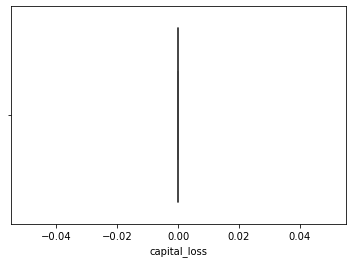

In [11]:
sns.boxplot(df['capital_loss'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

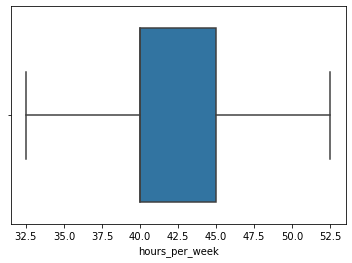

In [12]:
sns.boxplot(df['hours_per_week'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

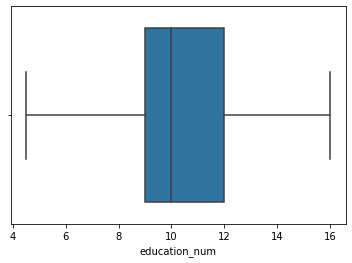

In [13]:
sns.boxplot(df['education_num'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_gain'>

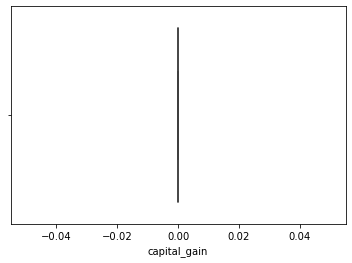

In [14]:
sns.boxplot(df['capital_gain'])

## Encoding

In [15]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [16]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
def feature_engineering(df):
    ## sex
    df['sex'] = np.where(df['sex'] == 'Male', 1, 0)

    ## race
    label_enco_race = {value: key for key, value in enumerate(df['race'].unique())}
    df['race'] = df['race'].map(label_enco_race)

    ## martial_status
    label_enco_martial = {value: key for key, value in enumerate(df['marital_status'].unique())}
    df['marital_status'] = df['marital_status'].map(label_enco_martial)

    ## occupation
    df['occupation'] = np.where(df['occupation'] == ' ?', 'Missing', df['occupation'])
    label_enco_occu = {value: key for key, value in enumerate(df['occupation'].unique())}
    df['occupation'] = df['occupation'].map(label_enco_occu)

    ## relationship
    label_enco_relation = {value: key for key, value in enumerate(df['relationship'].unique())}
    df['relationship'] = df['relationship'].map(label_enco_relation)

    ## native_country
    df['native_country'] = np.where(df['native_country'] == ' ?', 'Missing', df['native_country'])
    label_enco_workclass = {value: key for key, value in enumerate(df['native_country'].unique())}
    df['native_country'] = df['native_country'].map(label_enco_workclass)

    ## Workclass
    df['workclass'] = np.where(df['workclass'] == ' ?', 'Missing', df['workclass'])
    label_enco_workclass = {value: key for key, value in enumerate(df['workclass'].unique())}
    df['workclass'] = df['workclass'].map(label_enco_workclass)

    ## education
    label_enco_edu = {value: key for key, value in enumerate(df['education'].unique())}
    df['education'] = df['education'].map(label_enco_edu)

    ## Salary
    df['salary'] = np.where(df['salary'] == ' <=50K', 1, 0)


<AxesSubplot:>

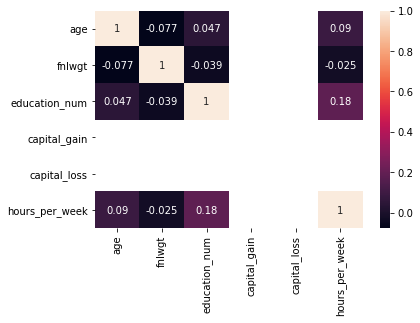

In [18]:
corr = df.corr()
sns.heatmap(corr, annot = True)

In [19]:
df = df.drop('fnlwgt', axis = 1)

In [20]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [21]:
feature_engineering(df)

In [22]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,0,13.0,0,0,0,0,0,0.0,0.0,40.0,0,1
1,50,1,0,13.0,1,1,1,0,0,0.0,0.0,32.5,0,1
2,38,2,1,9.0,2,2,0,0,0,0.0,0.0,40.0,0,1
3,53,2,2,7.0,1,2,1,1,0,0.0,0.0,40.0,0,1
4,28,2,0,13.0,1,3,2,1,0,0.0,0.0,40.0,1,1


## Machine Learning Part

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [24]:
X = df.drop('salary', axis = 1)
Y = df['salary']

In [37]:
ohe = OneHotEncoder()
ohe.fit(X)
onehotlabel = ohe.transform(X).toarray()
onehotlabel.shape

(32561, 211)

In [38]:
X = onehotlabel

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [41]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(x_train, y_train)
clf_lr = LogisticRegression()
clf_lr.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred_knn = clf_knn.predict(x_test)
y_pred_lr = clf_lr.predict(x_test)

In [43]:
def predicted(y1,y2):
    print("Accuracy Score: {}".format(accuracy_score(y1, y2)))
    print("Confusion Matrix:\n {}".format(confusion_matrix(y1, y2)))
    print("Classification Report:\n {}".format(classification_report(y1, y2)))

In [44]:
predicted(y_test, y_pred_knn)
predicted(y_test, y_pred_lr)

Accuracy Score: 0.820205742361431
Confusion Matrix:
 [[ 876  622]
 [ 549 4466]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.58      0.60      1498
           1       0.88      0.89      0.88      5015

    accuracy                           0.82      6513
   macro avg       0.75      0.74      0.74      6513
weighted avg       0.82      0.82      0.82      6513

Accuracy Score: 0.8452326116996776
Confusion Matrix:
 [[ 873  625]
 [ 383 4632]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.58      0.63      1498
           1       0.88      0.92      0.90      5015

    accuracy                           0.85      6513
   macro avg       0.79      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513



In [45]:
result = {
    'Actual' : y_test,
    'Predicted' : y_pred_knn
}

In [46]:
result = pd.DataFrame(result)

In [35]:
result.to_csv('result.csv', index=True, sep = ',')